<a href="https://colab.research.google.com/github/Ragini61/Predicting-customer-churn-using-machine-learning-to-uncover-hidden-patterns-/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-23-699974315d27>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Confusion Matrix:
[[6793    0]
 [  22 6060]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Accuracy Score: 0.9982912621359223


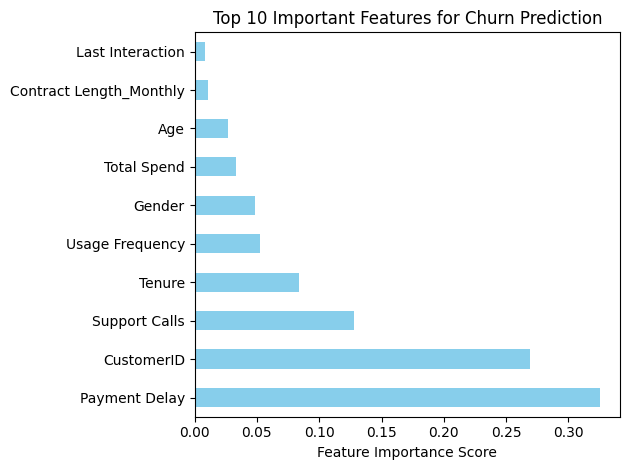

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Load dataset
df = pd.read_csv('customer_churn.csv')

# Step 2: Check and fill missing values
df.fillna(method='ffill', inplace=True)

# Step 3: Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col == 'Churn':
        df[col] = le.fit_transform(df[col])  # Ensure 'Yes'/'No' -> 1/0
    elif df[col].nunique() <= 2:
        df[col] = le.fit_transform(df[col])  # Binary encode
    else:
        df = pd.get_dummies(df, columns=[col])  # One-hot encode

# Step 4: Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 5: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 8: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features for Churn Prediction')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()